In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# 1. LOAD DATASET

In [3]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [4]:
display(df_train.head())
print('-' * 100)
display(df_test.head())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


----------------------------------------------------------------------------------------------------


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# 2. VALIDATE DATASET

Check the following criterias:
- Data types
- Missing values
- Duplicates
- Value counts of categorical features
- Statistics

## 2.1 Data types

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df_train.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [7]:
## Change the type of Credit_History to object

df_train.Credit_History = df_train.Credit_History.astype('object')

In [8]:
num_features = df_train.select_dtypes(['int64','float64']).columns
cat_features = df_train.select_dtypes('object').columns

## 2.2 Missing values

### Numerical Features

In [9]:
null_instances = df_train[num_features].isnull().sum()
null_instances

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
dtype: int64

In [10]:
null_num = null_instances.index[null_instances.values>0]
null_num

Index(['LoanAmount', 'Loan_Amount_Term'], dtype='object')

In [76]:
palette = {'Y' : '#228B22', 'N' : '#595959'}

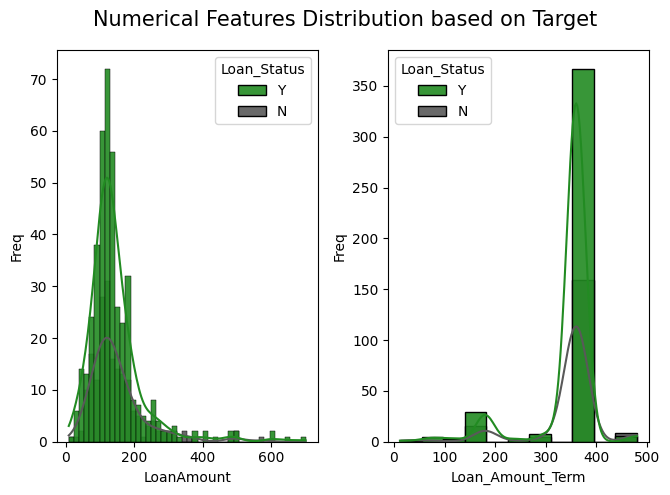

In [86]:
plt.figure(figsize=(10, 5))
plt.suptitle('Numerical Features Distribution based on Target', fontsize = 15, x=0.35)
for i in range(len(null_num)):
    plt.subplot(len(null_num)//3+1, 3, i+1)
    ax = sns.histplot(
        x = df_train[null_num[i]],
        kde = True,
        hue = df_train['Loan_Status'],
        hue_order = ['Y', 'N'],
        palette = palette, alpha = 0.9
    )
    ax.set_xlabel(null_num[i], fontsize = 10)
    ax.set_ylabel("Freq", fontsize = 10)
plt.tight_layout()
plt.show()

Because the distribution of non-loan-accepted loan amount is lower than the loan-accepted one on almost range and skewed, we will fill null values with median

In [13]:
## Fill null values with most frequent class

from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')
df_train[null_num] = pd.DataFrame(num_imputer.fit_transform(df_train[null_num]), columns=null_num)

### Categorical Features

In [14]:
null_instances = df_train[cat_features].isnull().sum()
null_instances

Loan_ID            0
Gender            13
Married            3
Dependents        15
Education          0
Self_Employed     32
Credit_History    50
Property_Area      0
Loan_Status        0
dtype: int64

In [15]:
null_cat = null_instances.index[null_instances.values>0]
null_cat

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History'], dtype='object')

In [16]:
## Check the proportion of instances of each class of categorical null features

for feature in null_cat:
    print(df_train[feature].value_counts(normalize=True))
    print('-'*40)

Gender
Male      0.813644
Female    0.186356
Name: proportion, dtype: float64
----------------------------------------
Married
Yes    0.651391
No     0.348609
Name: proportion, dtype: float64
----------------------------------------
Dependents
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: proportion, dtype: float64
----------------------------------------
Self_Employed
No     0.859107
Yes    0.140893
Name: proportion, dtype: float64
----------------------------------------
Credit_History
1.0    0.842199
0.0    0.157801
Name: proportion, dtype: float64
----------------------------------------


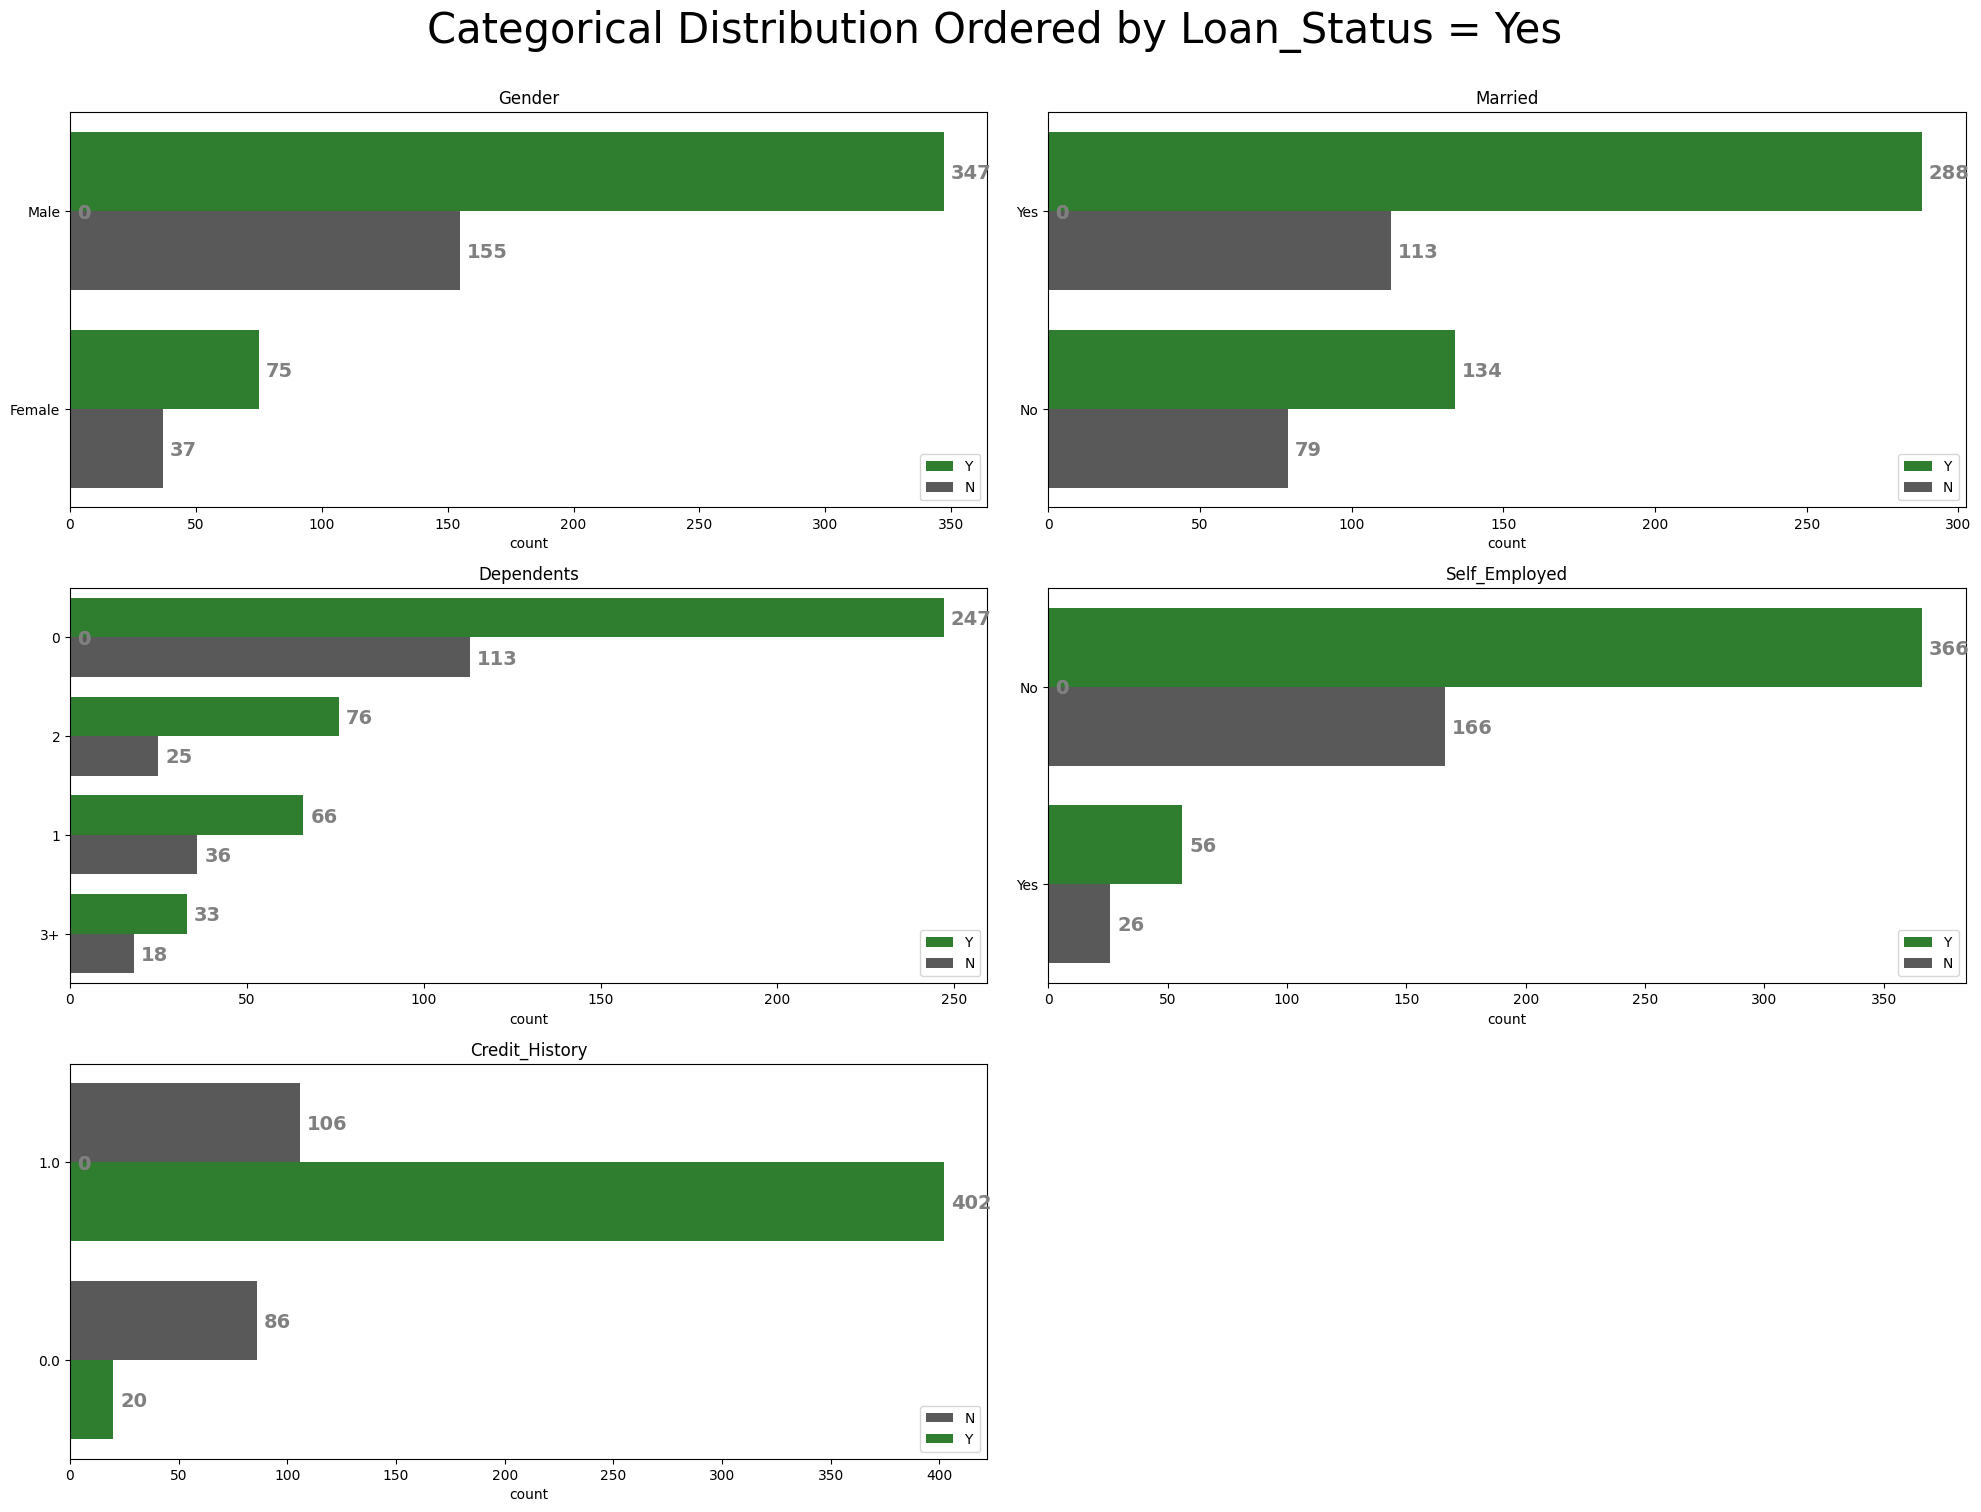

In [87]:
plt.figure(figsize=(20, 15))
plt.suptitle('Categorical Distribution Ordered by Loan_Status = Yes', fontsize=30, y = 1.005)
for i in range(len(null_cat)):
    plt.subplot(len(null_cat)//2+1, 2, i+1)
    ax = sns.countplot(
        y = df_train[null_cat[i]], palette = palette, order = pd.crosstab(df_train[null_cat[i]], df_train['Loan_Status']).sort_values(by='Y', ascending = False).index,
        hue = df_train['Loan_Status']
    )
    ax.set_ylabel('')
    ax.set_title(null_cat[i])
    
    for p in ax.patches:
        ax.annotate(
            format(p.get_width(), '.0f'),
            (p.get_width(), p.get_y() + p.get_height() / 2.), 
            ha = 'left',
            fontweight = "bold",
            xytext = (5,-5), 
            textcoords = 'offset points',
            color = 'gray', fontsize=14
        )
    ax.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

As we can see, almost the cateforical null features have not too much null values (0 - 32) and the percentages of loan status between classes are quite similar. Except for credit hisory feature there is large diffenrence in which percentage of accept-for-loan is higher for customers that have credit history, while that for non-credit-history is much lower. Therefore, we will fill null values of almost features with most frequent class, while we use some classification algorithm to predict credit history of customers based on several features

In [18]:
cat_imputer = SimpleImputer(strategy='most_frequent')
col = ['Gender', 'Married', 'Dependents', 'Self_Employed']
df_train[col] = pd.DataFrame(cat_imputer.fit_transform(df_train[col]), columns=col)

In [25]:
from sklearn.metrics import mutual_info_score

credit_nonnull = df_train.dropna(how='any', axis=0)

def mutual_score(feature):
    return round(mutual_info_score(feature, credit_nonnull['Credit_History']), 5)

credit_nonnull.drop(['Loan_ID','Credit_History','Loan_Status'], axis=1).apply(mutual_score).sort_values(ascending=False)

ApplicantIncome      0.37217
CoapplicantIncome    0.21147
LoanAmount           0.17631
Loan_Amount_Term     0.00808
Education            0.00315
Dependents           0.00164
Property_Area        0.00091
Gender               0.00009
Married              0.00002
Self_Employed        0.00000
dtype: float64

We will predict credit history of customers based on features with high mutual information score: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Status

In [26]:
x_train_credit = credit_nonnull.loc[:,['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
y_train_credit = credit_nonnull.loc[:,['Loan_Status']]

In [27]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [28]:
model_train_credit = [LogisticRegression(), DecisionTreeClassifier(max_depth=5), KNeighborsClassifier()]
for model in model_train_credit:
    model.fit(x_train_credit, y_train_credit)
    score = model.score(x_train_credit, y_train_credit)
    print(f'{str(model):<40} : {score:.4f}')

LogisticRegression()                     : 0.6826
DecisionTreeClassifier(max_depth=5)      : 0.7163
KNeighborsClassifier()                   : 0.7500


In [29]:
neighbors = np.arange(2,10)
for n in neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train_credit, y_train_credit)
    score = model.score(x_train_credit, y_train_credit)
    print(f'{str(model):<40} : {score:.4f}')

KNeighborsClassifier(n_neighbors=2)      : 0.7979
KNeighborsClassifier(n_neighbors=3)      : 0.7979
KNeighborsClassifier(n_neighbors=4)      : 0.7323
KNeighborsClassifier()                   : 0.7500
KNeighborsClassifier(n_neighbors=6)      : 0.7465
KNeighborsClassifier(n_neighbors=7)      : 0.7323
KNeighborsClassifier(n_neighbors=8)      : 0.7181
KNeighborsClassifier(n_neighbors=9)      : 0.7270


We will choose n = 3 for our model

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_credit, y_train_credit)
x_for_pred = df_train.loc[df_train.Credit_History.isnull(), ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
y_pred = knn.predict(x_for_pred)
df_train.loc[df_train.Credit_History.isnull(), 'Credit_History'] = [1.0 if pred == "Y" else 0.0 for pred in y_pred]

### 2.3 Duplicated values

In [46]:
df_train.duplicated().sum()

0

### 2.4 Value counts of categorical features

In [52]:
for feature in cat_features:
    print(df_train[feature].value_counts(normalize=True)[:5])
    

Loan_ID
LP001002    0.001629
LP002328    0.001629
LP002305    0.001629
LP002308    0.001629
LP002314    0.001629
Name: proportion, dtype: float64
Gender
Male      0.81759
Female    0.18241
Name: proportion, dtype: float64
Married
Yes    0.653094
No     0.346906
Name: proportion, dtype: float64
Dependents
0     0.586319
1     0.166124
2     0.164495
3+    0.083062
Name: proportion, dtype: float64
Education
Graduate        0.781759
Not Graduate    0.218241
Name: proportion, dtype: float64
Self_Employed
No     0.86645
Yes    0.13355
Name: proportion, dtype: float64
Credit_History
1.0    0.827362
0.0    0.172638
Name: proportion, dtype: float64
Property_Area
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: proportion, dtype: float64
Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


There is a imbalance is our dataset. So the tree-based models such as randomforest, GBM, XGBoost, etc. and evaluation metrics such as f1-score, etc. usually perform better.

### 2.5 Statistics

In [53]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423
std,6109.041673,2926.248369,84.107233,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,128.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


# 3. EDA

## 3.1 Numerical Features

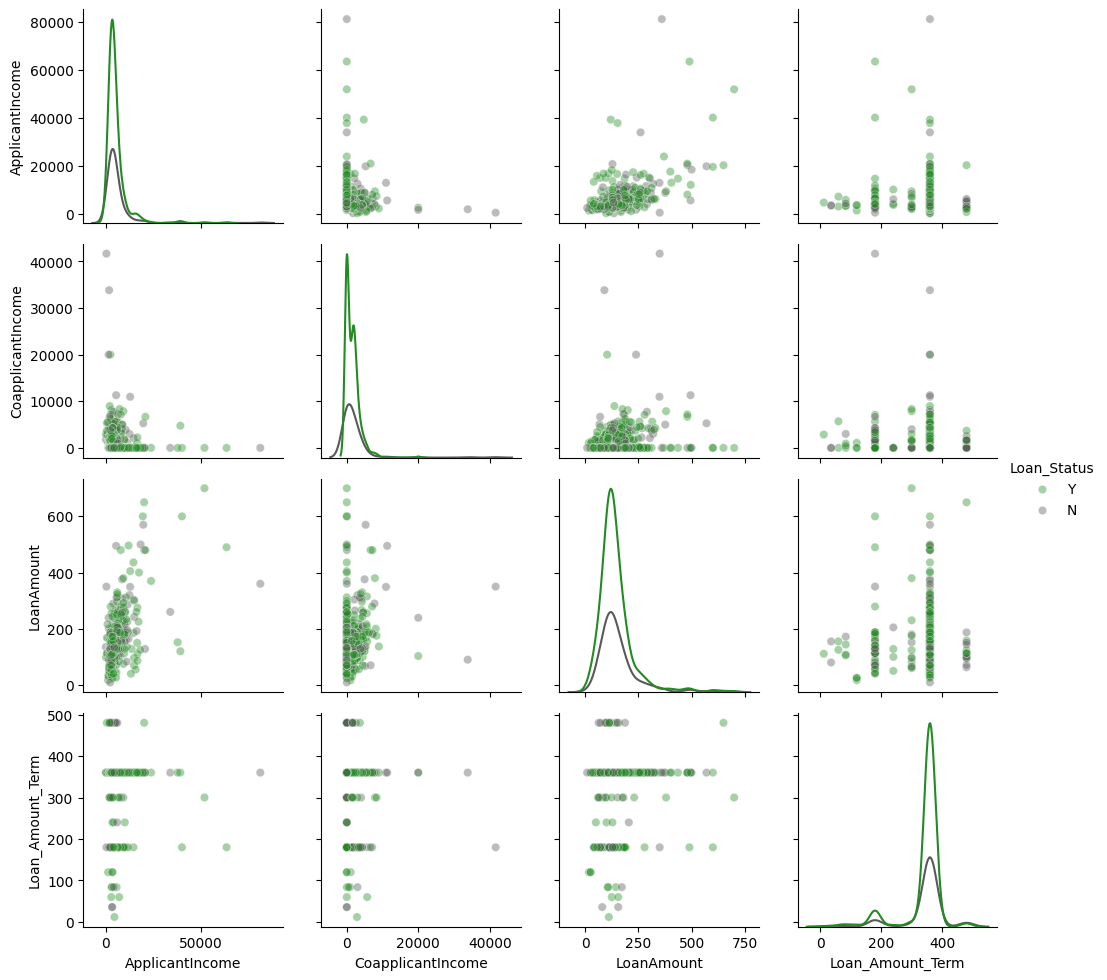

In [105]:
grid = sns.PairGrid(df_train[num_features.append(pd.Index(['Loan_Status']))], hue='Loan_Status', palette=palette,
                    diag_sharey=False)

grid.map_offdiag(sns.scatterplot, alpha=0.4)
grid.map_diag(sns.kdeplot)
grid.add_legend()

plt.show()

As we can see, the distribution of features are skewed. Therefore, we will transform them using log transformation to get normal distribution in the Data Preprocessing section

### Categorical Features

In [93]:
cat_features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [98]:
cat_features = cat_features.drop(['Loan_ID'])
cat_features

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


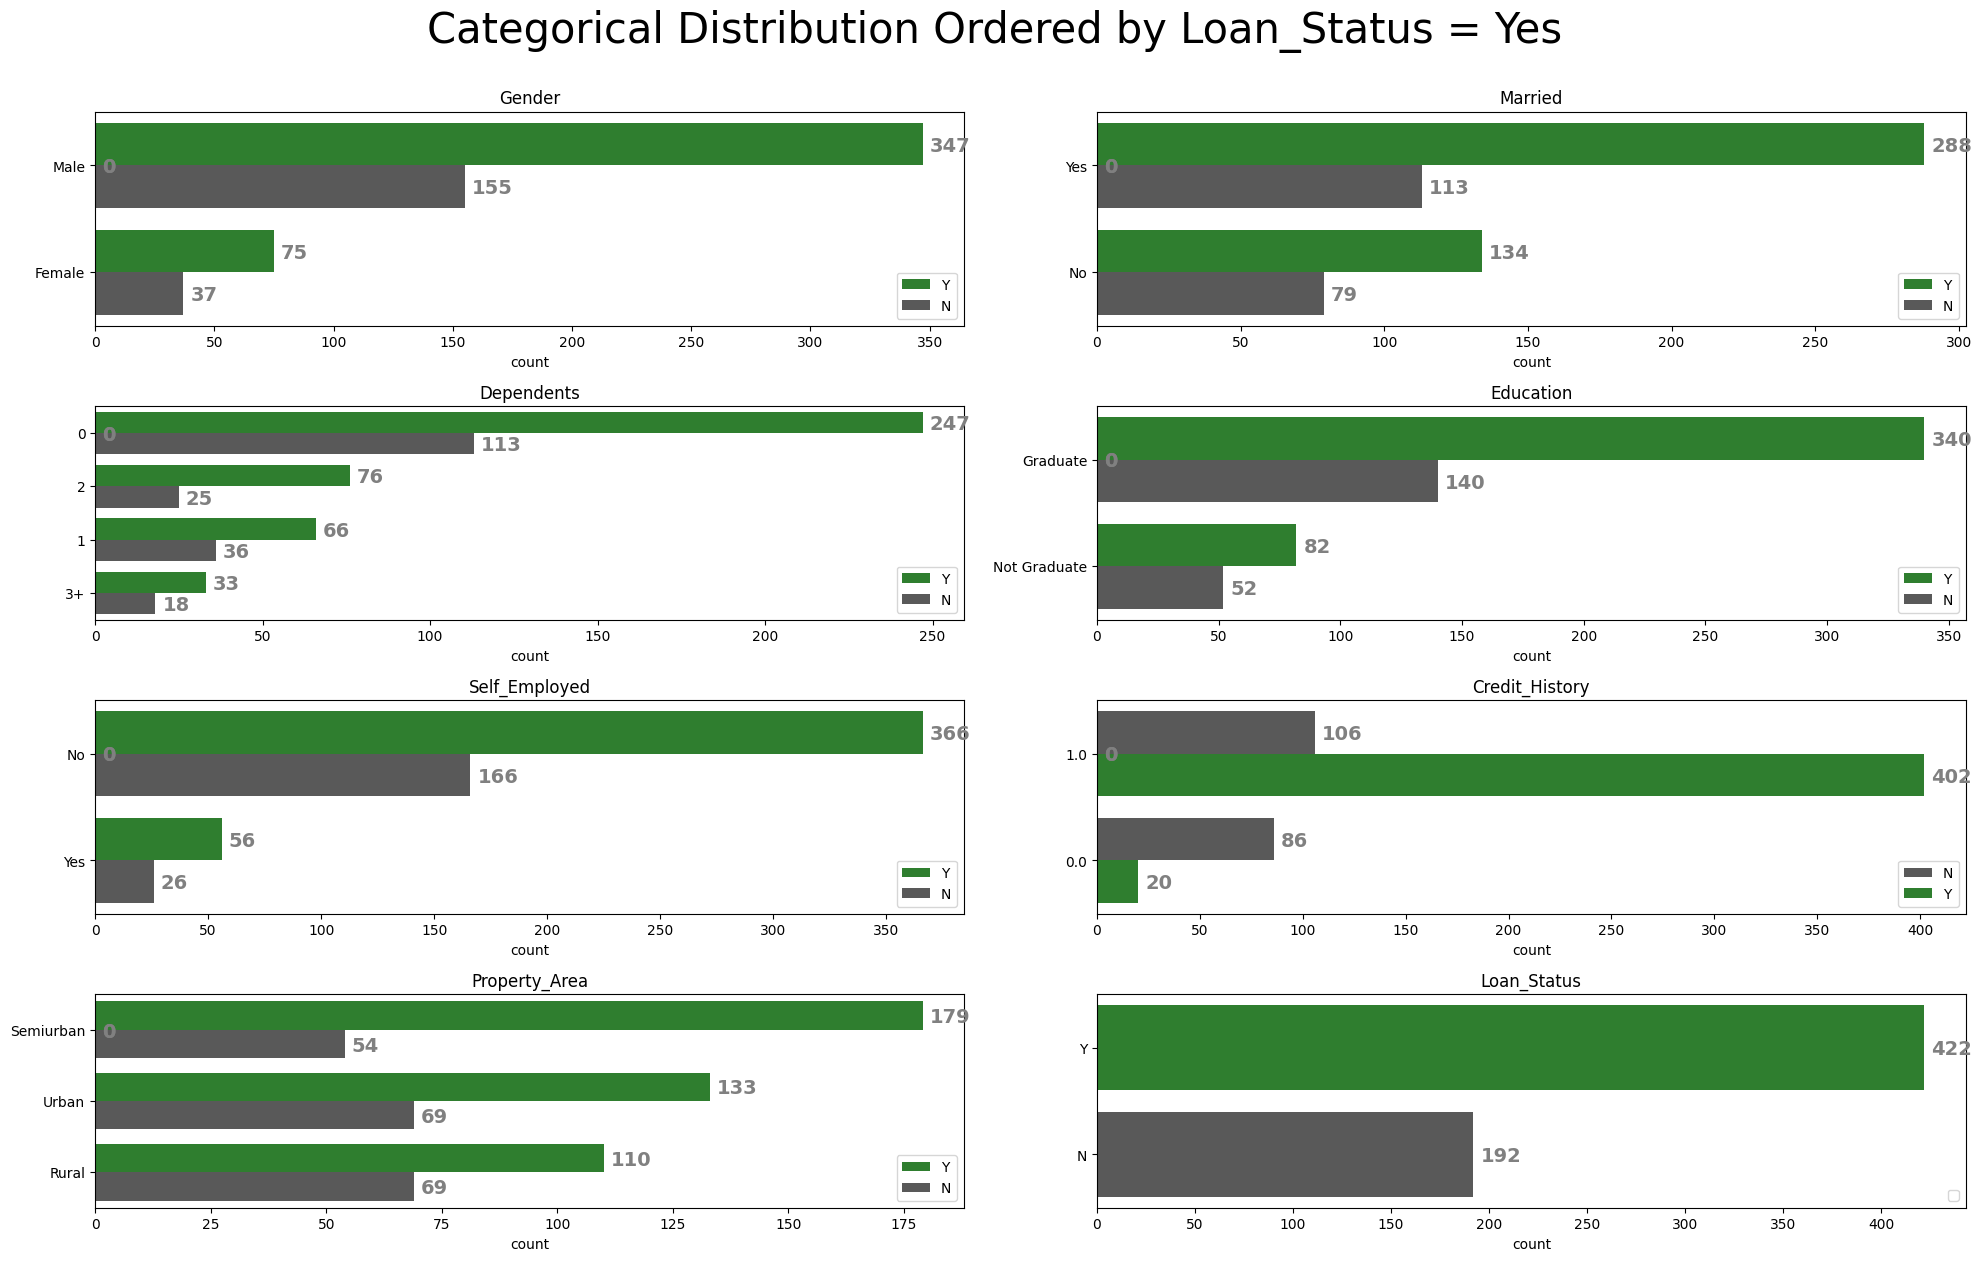

In [99]:
plt.figure(figsize=(20, 15))
plt.suptitle('Categorical Distribution Ordered by Loan_Status = Yes', fontsize=30, y = 1.005)
for i in range(len(cat_features)):
    plt.subplot(len(cat_features)//2+1, 2, i+1)
    ax = sns.countplot(
        y = df_train[cat_features[i]], palette = palette, order = pd.crosstab(df_train[cat_features[i]], df_train['Loan_Status']).sort_values(by='Y', ascending = False).index,
        hue = df_train['Loan_Status']
    )
    ax.set_ylabel('')
    ax.set_title(cat_features[i])
    
    for p in ax.patches:
        ax.annotate(
            format(p.get_width(), '.0f'),
            (p.get_width(), p.get_y() + p.get_height() / 2.), 
            ha = 'left',
            fontweight = "bold",
            xytext = (5,-5), 
            textcoords = 'offset points',
            color = 'gray', fontsize=14
        )
    ax.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

Comment:

In [12]:
df = pd.read_csv('../data/train_cleaned.csv')
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,Yes,Rural,1
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,Yes,Rural,1
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,Yes,Urban,1
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,Yes,Urban,1
613,Female,No,0,Graduate,Yes,4583.0,0.0,133.0,360.0,No,Semiurban,0


In [7]:
df['Credit_History'] = df['Credit_History'].map({1.0: 'Yes', 0.0: 'No'})

In [8]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.0,4.852030,5.886104,Yes,Urban,1
1,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,5.886104,Yes,Rural,0
2,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,5.886104,Yes,Urban,1
3,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,5.886104,Yes,Urban,1
4,Male,No,0,Graduate,No,8.699515,0.0,4.948760,5.886104,Yes,Urban,1


In [13]:
## Export data to csv
# df.drop('Loan_ID', axis=1, inplace=True)
df.to_csv('../data/train_cleaned.csv', index=False)